In [110]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import numpy as np
from tqdm import tqdm
import pandas as pd
import os

## 1.EDA

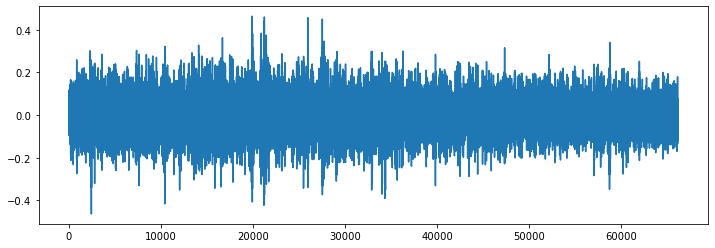

In [229]:
audio_file_path='商船渔船/train/1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## 2.数据预处理，转型为梅尔频率倒谱系数（MFCC）

In [114]:
#军舰训练集
path_mechant_train = '商船渔船/train/1-MerchantMarine/'
fileList_mechant_train = os.listdir(path_mechant_train)
mfccs_mechant_train = []
for i in tqdm(np.arange(len(fileList_mechant_train))):
    librosa_audio_data,librosa_sample_rate=librosa.load(path_mechant_train + fileList_mechant_train[i])
    mfccs_mechant_train.append(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40))

100%|██████████| 5931/5931 [10:52<00:00,  9.09it/s]


In [165]:
#合并新的军舰训练数据集
mfcc_mechant_train = np.array(mfccs_mechant_train)
x_mechant_train = mfcc_mechant_train.reshape(mfcc_mechant_train.shape[0],mfcc_mechant_train.shape[1]*mfcc_mechant_train.shape[2])
y_mechant_train = np.zeros((x_mechant_train.shape[0],1))
data_mechant_train = np.concatenate((x_mechant_train,y_mechant_train),axis=1)

In [127]:
#军舰测试集
path_mechant_test = '商船渔船/test/1-MerchantMarine/'
fileList_mechant_test = os.listdir(path_mechant_test)
mfccs_mechant_test = []
for i in tqdm(np.arange(len(fileList_mechant_test))):
    librosa_audio_data,librosa_sample_rate=librosa.load(path_mechant_test + fileList_mechant_test[i])
    mfccs_mechant_test.append(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40))

100%|██████████| 272/272 [00:29<00:00,  9.19it/s]


In [132]:
#合并新的军舰测试数据集
mfcc_mechant_test = np.array(mfccs_mechant_test)
x_mechant_test = mfcc_mechant_test.reshape(mfcc_mechant_test.shape[0],mfcc_mechant_test.shape[1]*mfcc_mechant_test.shape[2])
y_mechant_test = np.zeros((x_mechant_test.shape[0],1))
data_mechant_test = np.concatenate((x_mechant_test,y_mechant_test),axis=1)

In [129]:
#商船训练集
path_fish_train = '商船渔船/train/2-FishingBoat/'
fileList_fish_train = os.listdir(path_fish_train)
mfccs_fish_train = []
for i in tqdm(np.arange(len(fileList_fish_train))):
    librosa_audio_data,librosa_sample_rate=librosa.load(path_fish_train + fileList_fish_train[i])
    mfccs_fish_train.append(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40))

100%|██████████| 2169/2169 [04:01<00:00,  8.98it/s]


In [164]:
#合并新的商船训练数据集
mfcc_fish_train = np.array(mfccs_fish_train)
x_fish_train = mfcc_fish_train.reshape(mfcc_fish_train.shape[0],mfcc_fish_train.shape[1]*mfcc_fish_train.shape[2])
y_fish_train = np.ones((x_fish_train.shape[0],1))
data_fish_train = np.concatenate((x_fish_train,y_fish_train),axis=1)

In [130]:
#商船测试集
path_fish_test = '商船渔船/test/2-FishingBoat/'
fileList_fish_test = os.listdir(path_fish_test)
mfccs_fish_test = []
for i in tqdm(np.arange(len(fileList_fish_test))):
    librosa_audio_data,librosa_sample_rate=librosa.load(path_fish_test + fileList_fish_test[i])
    mfccs_fish_test.append(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40))

100%|██████████| 76/76 [00:08<00:00,  8.86it/s]


In [162]:
#合并新的商船测试数据集
mfcc_fish_test = np.array(mfccs_fish_test)
x_fish_test = mfcc_fish_test.reshape(mfcc_fish_test.shape[0],mfcc_fish_test.shape[1]*mfcc_fish_test.shape[2])
y_fish_test = np.ones((x_fish_test.shape[0],1))
data_fish_test = np.concatenate((x_fish_test,y_fish_test),axis=1)

In [211]:
#组合训练数据集，并划分数据和标签打乱
raw_train = np.concatenate((data_mechant_train,data_fish_train),axis=0)
np.random.shuffle(raw_train)
x_train = raw_train[:,0:-1]
y_train = raw_train[:,-1]

print(raw_train.shape)
z = pd.DataFrame(raw_train)
z

(8100, 5201)


,0,1,2,3,4,5,6,7,8,9,...,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200
0,-0.767893,8.040499,9.469634,5.079991,7.606539,18.320398,11.959598,9.749324,13.602968,18.638117,...,-4.264052,-3.986908,-0.838364,-3.171191,-1.976339,-1.638738,-1.086869,4.021818,3.404662,1.0
1,-127.712486,-137.331421,-166.490128,-166.920944,-175.832367,-182.760681,-181.303268,-183.186661,-178.992157,-172.606598,...,-2.068341,-0.311082,0.929813,-1.048836,-0.176409,1.125703,-0.861939,-0.654574,-2.200243,0.0
2,-170.399933,-181.978424,-226.839233,-238.324020,-240.083572,-225.259369,-145.499130,-129.756317,-186.014893,-246.216919,...,-2.441409,-6.006770,-8.143572,-5.074551,-4.229336,-3.622759,-4.640587,-1.813172,-3.547639,0.0
3,-221.114059,-219.553131,-229.261887,-230.133347,-227.491714,-235.597641,-237.341522,-226.893127,-227.661514,-233.091461,...,-1.703494,3.689080,2.979245,3.448658,3.987644,-0.112870,-2.478059,-0.453992,3.093955,0.0
4,-242.998581,-256.451202,-302.575073,-310.073151,-310.216370,-311.573944,-309.623871,-279.245605,-267.198120,-277.101959,...,-3.177187,0.964010,3.351281,0.615754,-3.892207,-5.442382,-2.180730,-0.177674,1.770287,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,-140.750809,-158.239975,-229.847855,-232.362061,-232.419617,-238.406769,-244.181519,-246.391388,-245.812256,-247.417542,...,-3.595867,-3.029140,1.628055,2.278102,-0.802388,-3.136577,-0.523016,0.956328,-1.226003,0.0
8096,-41.706760,-45.873356,-61.846451,-63.527798,-64.947495,-67.774490,-69.794090,-69.023415,-66.658798,-57.189697,...,-4.223566,-6.400228,-3.126822,1.158319,0.510830,0.863506,0.501184,-2.063868,0.725870,1.0
8097,-202.218506,-223.795929,-249.931992,-246.743271,-253.315613,-249.742218,-244.946899,-239.097290,-237.037781,-244.640961,...,2.943889,-1.654208,-3.928044,2.027446,1.824571,-1.571349,-1.308012,4.814501,9.057056,0.0
8098,-234.631973,-237.882263,-266.557617,-300.793915,-304.475800,-310.631348,-311.556152,-267.007294,-271.116241,-306.346954,...,3.432745,-2.668374,-2.954164,-0.338952,1.321135,2.564943,-3.229479,-5.500213,-5.406412,1.0


In [212]:
#组合测试数据集，并划分数据和标签打乱
raw_test = np.concatenate((data_mechant_test,data_fish_test),axis=0)
np.random.shuffle(raw_test)
x_test = raw_test[:,0:-1]
y_test = raw_test[:,-1]

print(raw_test.shape)
z = pd.DataFrame(raw_test)
z

(348, 5201)


,0,1,2,3,4,5,6,7,8,9,...,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200
0,-267.788849,-277.422272,-269.500671,-234.335464,-241.794586,-269.593262,-267.325165,-249.697891,-238.160721,-226.853088,...,1.847161,-0.371668,-2.107329,0.874355,-0.348990,0.445963,-0.618323,0.342739,0.826443,0.0
1,-212.437637,-225.996231,-254.019257,-245.519699,-237.004898,-243.381195,-247.172546,-254.851868,-253.510040,-233.550781,...,-5.150219,-1.749337,4.511985,5.123954,4.196180,1.831167,3.212694,6.813335,7.446565,0.0
2,-129.961319,-133.928162,-158.717545,-158.416199,-165.627823,-170.331879,-174.460602,-176.109177,-178.518448,-176.515060,...,2.851487,2.855726,1.245673,-0.589199,-0.854064,-2.685904,-2.221017,-0.576532,0.652783,0.0
3,-248.541367,-262.181946,-294.112427,-309.401581,-319.722839,-308.281372,-307.006561,-309.940460,-278.990784,-271.835083,...,-1.178215,-4.722936,-3.964459,-1.803824,-2.971985,-0.881327,1.864129,1.110403,-3.489383,0.0
4,-153.301743,-183.161758,-273.312561,-281.531982,-289.358459,-284.846710,-269.921814,-265.830994,-270.527679,-273.847504,...,-0.380291,-1.357699,-0.961959,1.205508,-1.126531,2.002598,4.585526,-0.524453,-2.734063,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-172.513504,-167.078598,-173.804230,-178.957764,-175.202118,-171.035355,-173.859406,-168.192413,-166.986877,-171.198135,...,-5.809791,-6.684798,-6.166644,-6.198419,-6.307789,-0.942966,1.389210,0.844908,3.048444,1.0
344,-146.600204,-153.155838,-181.231903,-183.634476,-197.660751,-188.240158,-170.490143,-159.410751,-182.779373,-196.389496,...,1.414099,-0.459368,-0.961253,1.231648,0.332976,-2.306746,-1.575798,-0.612193,0.565703,0.0
345,-89.821831,-90.086754,-71.641220,-68.818008,-81.751122,-68.035019,-78.034309,-74.935493,-60.151615,-70.360153,...,-3.391469,0.194471,1.953083,3.343480,7.561162,6.425287,7.838258,7.855106,3.471205,1.0
346,-117.321678,-123.950607,-142.413559,-149.883011,-156.055710,-158.034225,-143.210419,-123.224945,-119.309662,-137.977859,...,0.407830,-3.758612,-7.470331,-8.943672,-0.742189,2.163322,1.259367,0.950192,0.490448,0.0


## 3.搭建模型LSTM

In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,LSTM,Bidirectional
from tensorflow.keras.optimizers import Adam
import keras
from sklearn import metrics

In [213]:
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)

In [220]:
y_test = keras.utils.to_categorical(y_test, num_classes=2)
y_train = keras.utils.to_categorical(y_train, num_classes=2)

In [381]:
model=Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(2,activation='softmax'))

In [382]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4f00473ed0>>

In [383]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## 4.训练模型

In [454]:
#20个epoch
epoch = 200
batch_size = 1024

model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch)

Epoch 1/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1375 - accuracy: 0.9662
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1416 - accuracy: 0.9649
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1819 - accuracy: 0.9535
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1727 - accuracy: 0.9552
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1423 - accuracy: 0.9662
Epoch 6/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1366 - accuracy: 0.9672
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1327 - accuracy: 0.9673
Epoch 8/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1406 - accuracy: 0.9651
Epoch 9/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1529 - accuracy: 0.9591
Epoch 10/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1452 - accuracy: 0.9621
Epoch 11/200
8/8 [=

8/8 [==============================] - 0s 14ms/step - loss: 0.1315 - accuracy: 0.9673
Epoch 84/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1310 - accuracy: 0.9675
Epoch 85/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1303 - accuracy: 0.9677
Epoch 86/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1293 - accuracy: 0.9678
Epoch 87/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1308 - accuracy: 0.9678
Epoch 88/200
8/8 [==============================] - 0s 16ms/step - loss: 0.1299 - accuracy: 0.9675
Epoch 89/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1293 - accuracy: 0.9677
Epoch 90/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1295 - accuracy: 0.9677
Epoch 91/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1293 - accuracy: 0.9677
Epoch 92/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1305 - accuracy: 0.9678
Epoch 93/200
8/8 [=====

8/8 [==============================] - 0s 14ms/step - loss: 0.1441 - accuracy: 0.9652
Epoch 166/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1726 - accuracy: 0.9560
Epoch 167/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1409 - accuracy: 0.9662
Epoch 168/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1373 - accuracy: 0.9677
Epoch 169/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1362 - accuracy: 0.9675
Epoch 170/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1352 - accuracy: 0.9672
Epoch 171/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1357 - accuracy: 0.9665
Epoch 172/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1334 - accuracy: 0.9672
Epoch 173/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1341 - accuracy: 0.9674
Epoch 174/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1354 - accuracy: 0.9677
Epoch 175/200


## 5.测试模型

In [455]:
test_accuracy=model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9425
